In [62]:
import pathlib
import numpy as np
import PIL.Image as Image
import cv2

In [63]:
train_covid_dir=pathlib.Path("C:\\Users\\ShreerangaKV\\OneDrive - OneTrust\\Desktop\\TRAIN1\\TRAIN1\\COVID_19")

In [64]:
listOfTrainCovidImages=list(train_covid_dir.glob("*.*"))

In [65]:
train_non_covid_dir=pathlib.Path("C:\\Users\\ShreerangaKV\\OneDrive - OneTrust\\Desktop\\TRAIN1\\TRAIN1\\NON_COVID")

In [66]:
listOfTrainNonCovidImages=list(train_non_covid_dir.glob("*.*"))

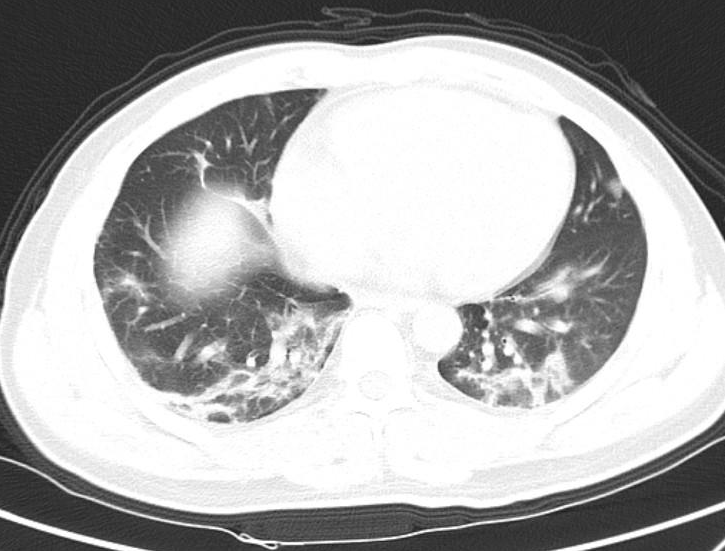

In [67]:
Image.open(listOfTrainCovidImages[0])

In [68]:
allImageDict={"covid":list(map(lambda item:str(item),listOfTrainCovidImages)),"non_covid":list(map(lambda item:str(item),listOfTrainNonCovidImages))}

In [69]:
covidLabel_dict={"covid":0,"non_covid":1}

In [49]:
cv2.imread(allImageDict["covid"][0]).shape

(551, 725, 3)

In [70]:
IMAGE_SHAPE = (224, 224)

In [71]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [72]:
X,y=[],[]

In [73]:
for item_name,images in allImageDict.items():
    for image in images:
        img=cv2.imread(image)
        resized_image=cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(covidLabel_dict[item_name])

In [74]:
X=np.array(X)
y=np.array(y)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [77]:
X_train_scaled=X_train/255

In [78]:
X_test_scaled=X_test/255

In [83]:
import tensorflow as tf
import tensorflow_hub as hub

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [84]:
numberOfClasses=2
model=tf.keras.Sequential([
pretrained_model_without_top_layer,
    tf.keras.layers.Dense(numberOfClasses)

])

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [87]:
model.compile(
optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["acc"])

In [94]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
13/13 [==============================] - 5s 394ms/step - loss: 0.3994 - acc: 0.8342
Epoch 2/10
13/13 [==============================] - 5s 399ms/step - loss: 0.3587 - acc: 0.8441
Epoch 3/10
13/13 [==============================] - 5s 406ms/step - loss: 0.3332 - acc: 0.8787
Epoch 4/10
13/13 [==============================] - 5s 412ms/step - loss: 0.3075 - acc: 0.8911
Epoch 5/10
13/13 [==============================] - 5s 416ms/step - loss: 0.2874 - acc: 0.9035
Epoch 6/10
13/13 [==============================] - 5s 414ms/step - loss: 0.2769 - acc: 0.9035
Epoch 7/10
13/13 [==============================] - 5s 410ms/step - loss: 0.2551 - acc: 0.9208
Epoch 8/10
13/13 [==============================] - 7s 539ms/step - loss: 0.2492 - acc: 0.9332
Epoch 9/10
13/13 [==============================] - 6s 493ms/step - loss: 0.2465 - acc: 0.9183
Epoch 10/10
13/13 [==============================] - 7s 495ms/step - loss: 0.2250 - acc: 0.9406


In [106]:
newImg="C:\\Users\\ShreerangaKV\\OneDrive - OneTrust\\Desktop\\TEST\\NON_COVID\\0.jpg"

In [107]:
non_covid = Image.open(newImg).resize(IMAGE_SHAPE)

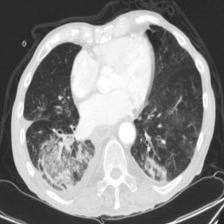

In [108]:
non_covid

In [109]:
non_covid = np.array(non_covid)/255.0

In [111]:
non_covid.shape

(224, 224, 3)

In [114]:
non_covid=non_covid[np.newaxis,...]

In [115]:
non_covid.shape

(1, 224, 224, 3)

In [117]:
res=model.predict(non_covid)

In [118]:
np.argmax(res)

1

In [119]:
covidLabel_dict["non_covid"]==np.argmax(res)

True